In [1]:
import pandas as pd
import sqlite3, matplotlib
from sqlalchemy import create_engine
import re

In [2]:
# read the marriage rates
df_mr = pd.read_csv('state_marriage_rates.csv', encoding='utf-8')
# read the divorce rates
df_dr = pd.read_csv('state_divorce_rates.csv', encoding='utf-8')

In [3]:
df_mr.head(5)

,State,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,Alabama,6.7,6.8,7.0,7.1,7.4,7.8,7.8,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
1,Alaska,6.5,6.7,6.9,7.1,7.4,7.5,7.3,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
2,Arizona,5.3,5.5,5.8,5.9,5.9,5.8,5.4,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
3,Arkansas,8.4,8.9,9.5,9.9,10.0,10.1,9.8,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
4,California,5.7,6.0,6.3,6.5,6.2,6.4,6.5,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9


In [5]:
df_mr.columns

Index(['State', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1995', '1990'],
      dtype='object')

In [6]:
df_mr= df_mr.iloc[:,0:24]
df_mr.head()

,State,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,Alabama,6.7,6.8,7.0,7.1,7.4,7.8,7.8,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
1,Alaska,6.5,6.7,6.9,7.1,7.4,7.5,7.3,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
2,Arizona,5.3,5.5,5.8,5.9,5.9,5.8,5.4,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
3,Arkansas,8.4,8.9,9.5,9.9,10.0,10.1,9.8,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
4,California,5.7,6.0,6.3,6.5,6.2,6.4,6.5,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9


In [7]:
# convert the float to strings for marriage rates
df_mr.columns = ['State']+['Y_'+str(col) for col in df_mr.columns if col != 'State']
df_mr.columns

Index(['State', 'Y_2019', 'Y_2018', 'Y_2017', 'Y_2016', 'Y_2015', 'Y_2014',
       'Y_2013', 'Y_2012', 'Y_2011', 'Y_2010', 'Y_2009', 'Y_2008', 'Y_2007',
       'Y_2006', 'Y_2005', 'Y_2004', 'Y_2003', 'Y_2002', 'Y_2001', 'Y_2000',
       'Y_1999', 'Y_1995', 'Y_1990'],
      dtype='object')

In [8]:
df_dr.head(5)

,State,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,Alabama,3.6,3.7,3.7,3.8,3.9,3.8,3.7,3.6,4.3,...,4.9,4.9,4.9,5.2,5.4,5.4,5.5,5.7,6.0,6.1
1,Alaska,3.6,3.7,3.6,3.9,4.1,4.0,4.5,4.5,4.8,...,4.2,4.3,4.3,3.9,4.6,4.3,3.9,5.0,5.0,5.5
2,Arizona,2.9,3.0,3.5,3.4,3.6,3.9,3.9,4.3,3.9,...,4.0,4.2,4.3,4.4,4.8,4.0,4.6,4.6,6.2,6.9
3,Arkansas,4.0,4.1,3.7,3.9,4.8,4.8,5.0,5.3,5.3,...,5.8,6.0,6.1,6.0,6.2,6.2,6.4,6.2,6.3,6.9
4,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.3


In [9]:
df_dr.columns

Index(['State', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1995', '1990'],
      dtype='object')

In [10]:
df_dr= df_dr.iloc[:,0:24]
df_dr.head()

,State,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,Alabama,3.6,3.7,3.7,3.8,3.9,3.8,3.7,3.6,4.3,...,4.9,4.9,4.9,5.2,5.4,5.4,5.5,5.7,6.0,6.1
1,Alaska,3.6,3.7,3.6,3.9,4.1,4.0,4.5,4.5,4.8,...,4.2,4.3,4.3,3.9,4.6,4.3,3.9,5.0,5.0,5.5
2,Arizona,2.9,3.0,3.5,3.4,3.6,3.9,3.9,4.3,3.9,...,4.0,4.2,4.3,4.4,4.8,4.0,4.6,4.6,6.2,6.9
3,Arkansas,4.0,4.1,3.7,3.9,4.8,4.8,5.0,5.3,5.3,...,5.8,6.0,6.1,6.0,6.2,6.2,6.4,6.2,6.3,6.9
4,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.3


In [11]:
# convert the float to strings for divorce rates
df_dr.columns = ['State']+['Y_'+str(col) for col in df_dr.columns if col != 'State']
df_dr.columns

Index(['State', 'Y_2019', 'Y_2018', 'Y_2017', 'Y_2016', 'Y_2015', 'Y_2014',
       'Y_2013', 'Y_2012', 'Y_2011', 'Y_2010', 'Y_2009', 'Y_2008', 'Y_2007',
       'Y_2006', 'Y_2005', 'Y_2004', 'Y_2003', 'Y_2002', 'Y_2001', 'Y_2000',
       'Y_1999', 'Y_1995', 'Y_1990'],
      dtype='object')

In [12]:
missing_mrdata_rows = df_mr[df_mr.isnull().any(1)]
missing_mrdata_rows

,State,Y_2019,Y_2018,Y_2017,Y_2016,Y_2015,Y_2014,Y_2013,Y_2012,Y_2011,...,Y_2006,Y_2005,Y_2004,Y_2003,Y_2002,Y_2001,Y_2000,Y_1999,Y_1995,Y_1990
10,Georgia,6.0,6.4,6.9,6.8,6.2,NaN,NaN,6.5,6.6,...,7.3,7.0,7.9,7.0,6.5,6.1,6.8,7.8,8.4,10.3
18,Louisiana,5.1,5.1,5.6,6.1,6.8,6.9,6.4,5.7,6.4,...,NaN,8.0,8.0,8.2,8.1,8.4,9.1,9.1,9.3,9.6
36,Oklahoma,6.3,6.4,6.8,6.7,7.4,7.1,7.1,6.9,6.9,...,7.3,7.3,6.5,NaN,NaN,NaN,NaN,6.8,8.6,10.6


In [13]:
gamr = missing_mrdata_rows.iloc[0][1:]
lamr = missing_mrdata_rows.iloc[1][1:]
okmr = missing_mrdata_rows.iloc[2][1:]
gamr_index, lamr_index, okmr_index = 10, 18, 36

<AxesSubplot:>

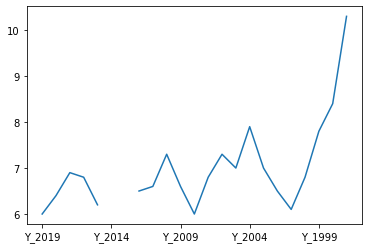

In [14]:
# plot the mr for Georgia
gamr.plot()

<AxesSubplot:>

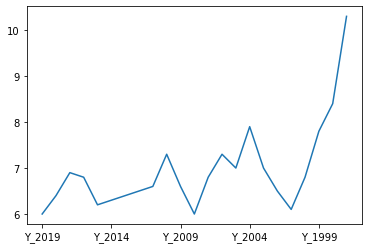

In [15]:
gamr_clean_df = gamr.astype(float).interpolate()
gamr_clean_df.plot()

<AxesSubplot:>

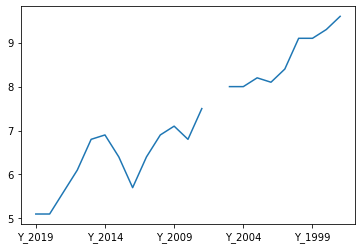

In [16]:
# plot the mr for Louisiana
lamr.plot()

<AxesSubplot:>

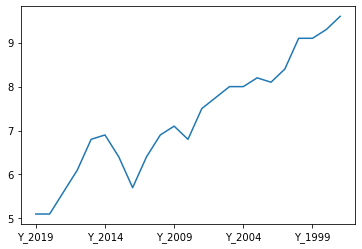

In [17]:
lamr_clean_df = lamr.astype(float).interpolate()
lamr_clean_df.plot()

<AxesSubplot:>

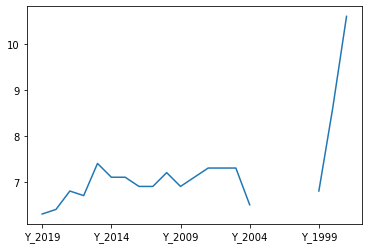

In [18]:
# plot the mr for Oklahoma
okmr.plot()

<AxesSubplot:>

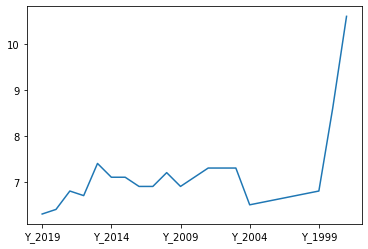

In [19]:
okmr_clean_df = okmr.astype(float).interpolate()
okmr_clean_df.plot()

In [20]:
# assign the clean data to the states that have missing mr data
df_mr.iloc[gamr_index, 1:]= gamr_clean_df.values
df_mr.iloc[lamr_index, 1:]= lamr_clean_df.values
df_mr.iloc[okmr_index, 1:]= okmr_clean_df.values

In [21]:
# check if the missing mr datapoints still exist 
check_missingmr_data_rows = df_mr[df_mr.isnull().any(1)]
check_missingmr_data_rows

,State,Y_2019,Y_2018,Y_2017,Y_2016,Y_2015,Y_2014,Y_2013,Y_2012,Y_2011,...,Y_2006,Y_2005,Y_2004,Y_2003,Y_2002,Y_2001,Y_2000,Y_1999,Y_1995,Y_1990


In [22]:
df_mr.head()

,State,Y_2019,Y_2018,Y_2017,Y_2016,Y_2015,Y_2014,Y_2013,Y_2012,Y_2011,...,Y_2006,Y_2005,Y_2004,Y_2003,Y_2002,Y_2001,Y_2000,Y_1999,Y_1995,Y_1990
0,Alabama,6.7,6.8,7.0,7.1,7.4,7.8,7.8,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
1,Alaska,6.5,6.7,6.9,7.1,7.4,7.5,7.3,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
2,Arizona,5.3,5.5,5.8,5.9,5.9,5.8,5.4,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
3,Arkansas,8.4,8.9,9.5,9.9,10.0,10.1,9.8,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
4,California,5.7,6.0,6.3,6.5,6.2,6.4,6.5,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9


In [23]:
df_mr.columns

Index(['State', 'Y_2019', 'Y_2018', 'Y_2017', 'Y_2016', 'Y_2015', 'Y_2014',
       'Y_2013', 'Y_2012', 'Y_2011', 'Y_2010', 'Y_2009', 'Y_2008', 'Y_2007',
       'Y_2006', 'Y_2005', 'Y_2004', 'Y_2003', 'Y_2002', 'Y_2001', 'Y_2000',
       'Y_1999', 'Y_1995', 'Y_1990'],
      dtype='object')

In [24]:
missing_drdata_rows = df_dr[df_dr.isnull().any(1)]
missing_drdata_rows

,State,Y_2019,Y_2018,Y_2017,Y_2016,Y_2015,Y_2014,Y_2013,Y_2012,Y_2011,...,Y_2006,Y_2005,Y_2004,Y_2003,Y_2002,Y_2001,Y_2000,Y_1999,Y_1995,Y_1990
4,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.3
5,Colorado,3.3,3.3,3.2,3.6,3.7,3.9,4.1,4.3,4.4,...,4.5,4.4,4.4,4.3,4.7,4.7,4.7,4.8,NaN,5.5
10,Georgia,2.3,2.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.2,2.5,3.1,3.3,4.1,5.1,5.5
11,Hawaii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.7,4.0,3.9,3.8,4.6,4.6
14,Indiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Louisiana,2.4,1.7,1.9,2.0,2.8,2.3,2.2,NaN,NaN,...,NaN,NaN,NaN,3.4,3.3,NaN,NaN,NaN,NaN,NaN
23,Minnesota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.8,3.0,3.1,3.2,3.2,3.2,3.4,3.5
31,New Mexico,NaN,NaN,NaN,NaN,3.3,3.6,3.4,3.0,3.3,...,4.3,4.6,4.6,5.2,4.4,4.9,5.1,4.6,6.6,4.9
36,Oklahoma,3.9,3.8,4.1,4.4,4.4,4.5,4.5,4.8,5.2,...,5.3,5.6,4.9,NaN,NaN,NaN,NaN,NaN,6.6,7.7


In [25]:
cadr = missing_drdata_rows.iloc[0][1:]
codr = missing_drdata_rows.iloc[1][1:]
gadr = missing_drdata_rows.iloc[2][1:]
hidr = missing_drdata_rows.iloc[3][1:]
indr = missing_drdata_rows.iloc[4][1:]
ladr = missing_drdata_rows.iloc[5][1:]
mndr = missing_drdata_rows.iloc[6][1:]
nmdr = missing_drdata_rows.iloc[7][1:]
okdr = missing_drdata_rows.iloc[8][1:]
cadr_index, codr_index, gadr_index, hidr_index, indr_index, ladr_index, mndr_index, nmdr_index, okdr_index = 4, 5, 10, 11, 14, 18, 23, 31, 36

<AxesSubplot:>

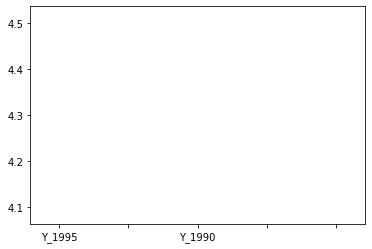

In [55]:
# plot the dr for California
cadr.plot()

<AxesSubplot:>

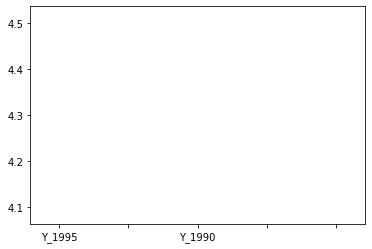

In [27]:
cadr_clean_df = cadr.astype(float).interpolate()
cadr_clean_df.plot()

<AxesSubplot:>

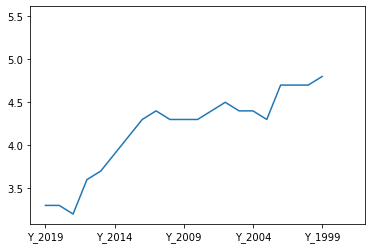

In [28]:
# plot the dr for Colorado
codr.plot()

<AxesSubplot:>

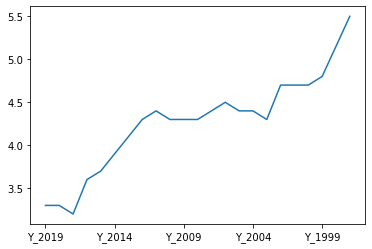

In [29]:
codr_clean_df = codr.astype(float).interpolate()
codr_clean_df.plot()

<AxesSubplot:>

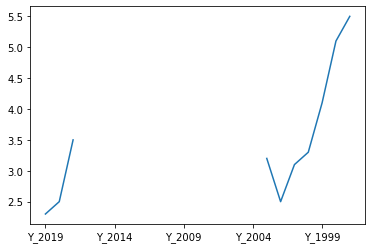

In [30]:
# plot the dr for Georgia
gadr.plot()

<AxesSubplot:>

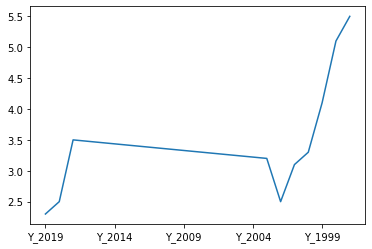

In [31]:
gadr_clean_df = gadr.astype(float).interpolate()
gadr_clean_df.plot()

<AxesSubplot:>

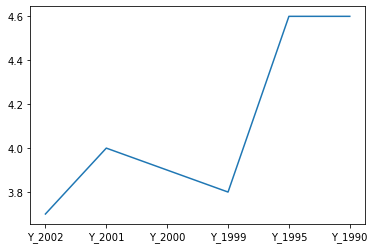

In [32]:
# plot the dr for Hawaii
hidr.plot()

<AxesSubplot:>

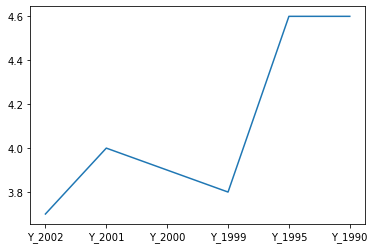

In [33]:
hidr_clean_df = hidr.astype(float).interpolate()
hidr_clean_df.plot()

<AxesSubplot:>

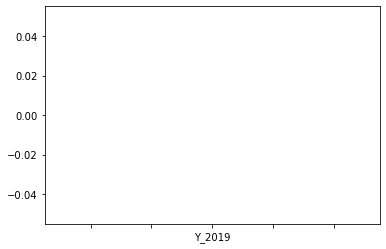

In [34]:
# plot the dr for Indiana
indr.plot()

<AxesSubplot:>

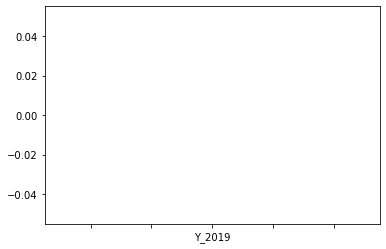

In [35]:
indr_clean_df = indr.astype(float).interpolate()
indr_clean_df.plot()

<AxesSubplot:>

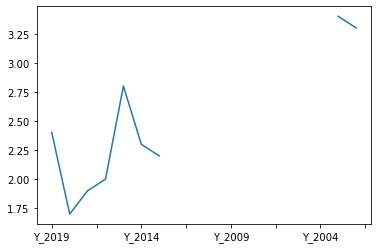

In [36]:
# plot the dr for Louisiana
ladr.plot()

<AxesSubplot:>

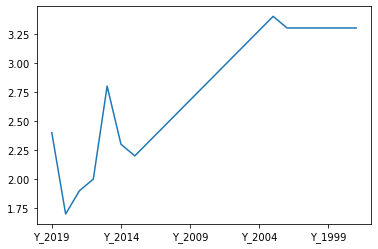

In [37]:
ladr_clean_df = ladr.astype(float).interpolate()
ladr_clean_df.plot()

<AxesSubplot:>

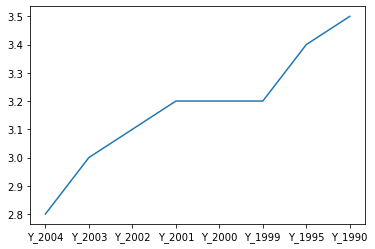

In [38]:
# plot the dr for Minnesota
mndr.plot()

<AxesSubplot:>

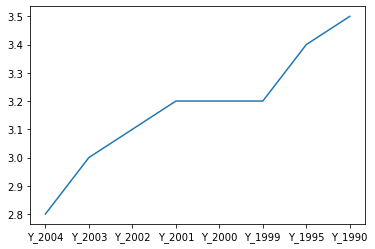

In [39]:
mndr_clean_df = mndr.astype(float).interpolate()
mndr_clean_df.plot()

<AxesSubplot:>

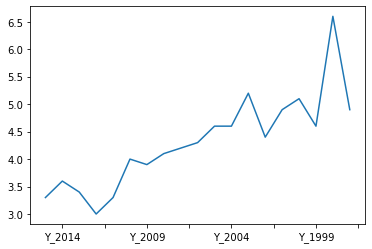

In [40]:
# plot the dr for New Mexico
nmdr.plot()

<AxesSubplot:>

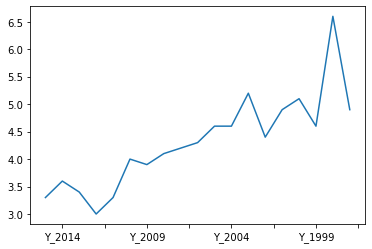

In [41]:
nmdr_clean_df = nmdr.astype(float).interpolate()
nmdr_clean_df.plot()

<AxesSubplot:>

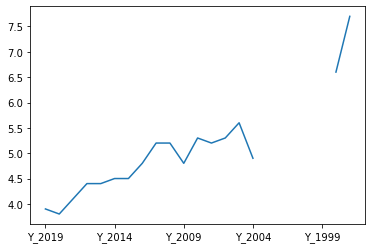

In [42]:
# plot the dr for Oklahoma
okdr.plot()

<AxesSubplot:>

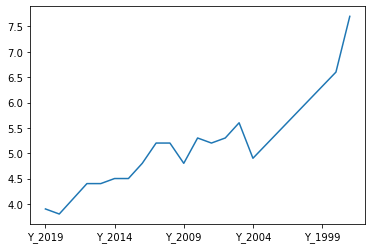

In [43]:
okdr_clean_df = okdr.astype(float).interpolate()
okdr_clean_df.plot()

In [44]:
# assign the clean data to the states that have missing dr data
df_dr.iloc[cadr_index, 1:]= cadr_clean_df.values
df_dr.iloc[codr_index, 1:]= codr_clean_df.values
df_dr.iloc[gadr_index, 1:]= gadr_clean_df.values
df_dr.iloc[hidr_index, 1:]= hidr_clean_df.values
df_dr.iloc[indr_index, 1:]= indr_clean_df.values
df_dr.iloc[ladr_index, 1:]= ladr_clean_df.values
df_dr.iloc[mndr_index, 1:]= mndr_clean_df.values
df_dr.iloc[nmdr_index, 1:]= nmdr_clean_df.values
df_dr.iloc[okdr_index, 1:]= okdr_clean_df.values

In [45]:
# check if the missing dr datapoints still exist 
check_missingdr_data_rows = df_dr[df_dr.isnull().any(1)]
check_missingdr_data_rows

,State,Y_2019,Y_2018,Y_2017,Y_2016,Y_2015,Y_2014,Y_2013,Y_2012,Y_2011,...,Y_2006,Y_2005,Y_2004,Y_2003,Y_2002,Y_2001,Y_2000,Y_1999,Y_1995,Y_1990
4,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.3
11,Hawaii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.7,4.0,3.9,3.8,4.6,4.6
14,Indiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Minnesota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.8,3.0,3.1,3.2,3.2,3.2,3.4,3.5
31,New Mexico,NaN,NaN,NaN,NaN,3.3,3.6,3.4,3.0,3.3,...,4.3,4.6,4.6,5.2,4.4,4.9,5.1,4.6,6.6,4.9


In [46]:
engine = create_engine('sqlite:///../db/marriage_and_divorce_rates.sqlite', echo=False)

In [47]:
# save the marriage data into sqlite
df_mr.to_sql('marriage_rates', con=engine, if_exists='replace')

In [48]:
# save the divorce data into sqlite
df_dr.to_sql('divorce_rates', con=engine, if_exists='replace')

In [49]:
engine.execute("SELECT * FROM marriage_rates").fetchall()

[(0, 'Alabama', 6.7, 6.8, 7.0, 7.1, 7.4, 7.8, 7.8, 8.2, 8.4, 8.2, 8.3, 8.6, 8.9, 9.2, 9.2, 9.4, 9.6, 9.9, 9.4, 10.1, 10.8, 9.8, 10.6),
 (1, 'Alaska', 6.5, 6.7, 6.9, 7.1, 7.4, 7.5, 7.3, 7.2, 7.8, 8.0, 7.8, 8.4, 8.5, 8.2, 8.2, 8.5, 8.1, 8.3, 8.1, 8.9, 8.6, 9.0, 10.2),
 (2, 'Arizona', 5.3, 5.5, 5.8, 5.9, 5.9, 5.8, 5.4, 5.6, 5.7, 5.9, 5.6, 6.0, 6.4, 6.5, 6.6, 6.7, 6.5, 6.7, 7.6, 7.5, 8.2, 8.8, 10.0),
 (3, 'Arkansas', 8.4, 8.9, 9.5, 9.9, 10.0, 10.1, 9.8, 10.9, 10.4, 10.8, 10.7, 10.6, 12.0, 12.4, 12.9, 13.4, 13.4, 14.3, 14.3, 15.4, 14.8, 14.4, 15.3),
 (4, 'California', 5.7, 6.0, 6.3, 6.5, 6.2, 6.4, 6.5, 6.0, 5.8, 5.8, 5.8, 6.7, 6.2, 6.3, 6.4, 6.4, 6.1, 6.2, 6.5, 5.8, 6.4, 6.3, 7.9),
 (5, 'Colorado', 7.3, 7.6, 7.3, 7.4, 6.8, 7.1, 6.5, 6.8, 7.0, 6.9, 6.9, 7.4, 7.1, 7.2, 7.6, 7.4, 7.8, 8.0, 8.2, 8.3, 8.2, 9.0, 9.8),
 (6, 'Connecticut', 5.0, 5.3, 5.6, 5.6, 5.3, 5.4, 5.0, 5.2, 5.5, 5.6, 5.9, 5.4, 5.5, 5.5, 5.8, 5.8, 5.5, 5.7, 5.4, 5.7, 5.8, 6.6, 7.9),
 (7, 'Delaware', 5.0, 5.2, 5.5, 5.6, 5.7, 6.0

In [50]:
engine.execute("SELECT * FROM divorce_rates").fetchall()

[(0, 'Alabama', 3.6, 3.7, 3.7, 3.8, 3.9, 3.8, 3.7, 3.6, 4.3, 4.4, 4.4, 4.3, 4.5, 4.9, 4.9, 4.9, 5.2, 5.4, 5.4, 5.5, 5.7, 6.0, 6.1),
 (1, 'Alaska', 3.6, 3.7, 3.6, 3.9, 4.1, 4.0, 4.5, 4.5, 4.8, 4.7, 4.4, 4.4, 4.3, 4.2, 4.3, 4.3, 3.9, 4.6, 4.3, 3.9, 5.0, 5.0, 5.5),
 (2, 'Arizona', 2.9, 3.0, 3.5, 3.4, 3.6, 3.9, 3.9, 4.3, 3.9, 3.5, 3.6, 3.8, 4.0, 4.0, 4.2, 4.3, 4.4, 4.8, 4.0, 4.6, 4.6, 6.2, 6.9),
 (3, 'Arkansas', 4.0, 4.1, 3.7, 3.9, 4.8, 4.8, 5.0, 5.3, 5.3, 5.7, 5.7, 5.5, 5.9, 5.8, 6.0, 6.1, 6.0, 6.2, 6.2, 6.4, 6.2, 6.3, 6.9),
 (4, 'California', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 4.3),
 (5, 'Colorado', 3.3, 3.3, 3.2, 3.6, 3.7, 3.9, 4.1, 4.3, 4.4, 4.3, 4.3, 4.3, 4.4, 4.5, 4.4, 4.4, 4.3, 4.7, 4.7, 4.7, 4.8, 5.15, 5.5),
 (6, 'Connecticut', 2.7, 2.9, 2.9, 3.2, 3.1, 2.6, 2.8, 2.7, 3.1, 2.9, 3.0, 3.4, 3.2, 3.1, 3.0, 3.1, 3.2, 3.3, 3.2, 3.3, 3.0, 2.9, 3.2),
 (7, 'Delaware', 2.9, 2.8, 3.0, 3.1, 3.1, 3.3

In [51]:
# Convert the index to primary key
def get_create_table_string(tablename, connection):
    sql = """
    select * from sqlite_master where name = "{}" and type = "table"
    """.format(tablename) 
    result = connection.execute(sql)

    create_table_string = result.fetchmany()[0][4]
    return create_table_string

def add_pk_to_create_table_string(create_table_string, colname):
    regex = "(\n.+{}[^,]+)(,)".format(colname)
    return re.sub(regex, "\\1 PRIMARY KEY,",  create_table_string, count=1)

def add_pk_to_sqlite_table(tablename, index_column, connection):
    cts = get_create_table_string(tablename, connection)
    cts = add_pk_to_create_table_string(cts, index_column)
    template = """
    BEGIN TRANSACTION;
        ALTER TABLE {tablename} RENAME TO {tablename}_old_;

        {cts};

        INSERT INTO {tablename} SELECT * FROM {tablename}_old_;

        DROP TABLE {tablename}_old_;

    COMMIT TRANSACTION;
    """

    create_and_drop_sql = template.format(tablename = tablename, cts = cts)
    connection.executescript(create_and_drop_sql)

In [52]:
con = sqlite3.connect("../db/marriage_and_divorce_rates.sqlite")
# add_pk_to_sqlite_table('marriage_rates', 'index',)

In [53]:
add_pk_to_sqlite_table('marriage_rates', 'index', con)

In [54]:
add_pk_to_sqlite_table('divorce_rates', 'index', con)